In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.float_format = "{:,.2f}".format

### Problem Statement: 

* For text document sometimes we have to find out context from given text. Sometimes classes are hierarchical and model have to predict different levels of classes.

* In this problem the goal is to classify given text in hierarchy of classes.

#### Data: 

Attached is review of products, you can demonstrate how you approach to classify given text.

##### Data description:

Productid: Unique ID of product

Title: Title of review

userId: unique ID of user

Time: timestamp of review

Text: Review of product given by user

Cat1:  First level cat

Cat2: Second level cat

Cat3: third level cat

In [3]:
data = pd.read_csv("data.csv")
data.head()

,productId,Title,userId,Time,Text,Cat1,Cat2,Cat3
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys


In [4]:
data.columns = ["product_id", "title", "user_id", "time", "text", "cat1", "cat2", "cat3"]
data.head()

,product_id,title,user_id,time,text,cat1,cat2,cat3
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys


In [5]:
data.isnull().sum(), data.isnull().mean()

(product_id    0
 title         5
 user_id       0
 time          0
 text          0
 cat1          0
 cat2          0
 cat3          0
 dtype: int64,
 product_id   0.00
 title        0.00
 user_id      0.00
 time         0.00
 text         0.00
 cat1         0.00
 cat2         0.00
 cat3         0.00
 dtype: float64)

In [6]:
# dropping rows that contain null values as very few of rows have null values
data.dropna(inplace=True)

In [7]:
# we wanted to predict different hierarchy of classes => based on title of the product, text of the product
# as title of the product may be related to the project  => we try to add title multiple times to give more weightage to title
# as a particular word is repeated more number of times in title => 
# most repeated word gets more priority with representations such as bag of words or tf-idf

data["content"] = data["title"]*3 + data["text"]

data.head()

,product_id,title,user_id,time,text,cat1,cat2,cat3,content
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps,PetSafe Staywell Pet Door with Clear Hard Flap...
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food,"Kaytee Timothy Cubes, 1-PoundKaytee Timothy Cu..."
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation,Body Back BuddyBody Back BuddyBody Back Buddyw...
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats,SnackMasters California Style Turkey JerkySnac...
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...


In [8]:
data.describe(include="object")

,product_id,title,user_id,text,cat1,cat2,cat3,content
count,9995,9995,9995,9995,9995,9995,9995,9995
unique,6863,6512,9711,9849,6,64,377,9888
top,B000GLRREU,China Glaze Nail Lacquer with Hardeners,AFYTXZWIZII6G,Very good product! This smells good and feels ...,health personal care,nutrition wellness,vitamins supplements,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
freq,30,89,11,11,2987,904,665,11


## Objective:

* Classify text in multiple hierarchy of classes.

### Exploratory Data Analysis

<hr>

#### <font color="blue">Observations => Inferences:</font>

<hr>

<pre>
<font color="green">
* We have 10k rows in total.
* We have 6865 unique products and 6512 unique titles. => Two different products may have same title (may be a product with different colours are given the same title)
* We have a product B000GLRREU with 30 reviews => A single product id has at maximum 30 reviews.
* We have a product with title China Glaze Nail Lacquer with Hardeners have 89 reviews.
* We have 9716 unique users who have written reviews.
* We have few duplicate rows if we remove the product_id column (dropping the rows) => no extra information other than the different unique id (so dropping as of now).
* We have 6 unique categories in "cat1" and 64 in "cat2" and 377 in "cat3".

</font></pre>

In [9]:
data.isnull().sum()

product_id    0
title         0
user_id       0
time          0
text          0
cat1          0
cat2          0
cat3          0
content       0
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)
data.describe(include="object")

,product_id,title,user_id,text,cat1,cat2,cat3,content
count,9995,9995,9995,9995,9995,9995,9995,9995
unique,6863,6512,9711,9849,6,64,377,9888
top,B000GLRREU,China Glaze Nail Lacquer with Hardeners,AFYTXZWIZII6G,Very good product! This smells good and feels ...,health personal care,nutrition wellness,vitamins supplements,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
freq,30,89,11,11,2987,904,665,11


In [11]:
data[data["user_id"]=="AFYTXZWIZII6G"]

,product_id,title,user_id,time,text,cat1,cat2,cat3,content
8140,B000BJSX3G,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8145,B0001FUTQE,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8149,B0001FUTJQ,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8150,B0001FUTIW,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8151,B0000ZLRHA,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8171,B0000ZLQU8,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8172,B0000ZLR9S,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8175,B0000ZLRFC,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8176,B000CE8A0G,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...
8181,B000BK5YXW,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...,AFYTXZWIZII6G,1359417600,Very good product! This smells good and feels ...,health personal care,personal care,lip care products,My Lip Stuff- Tube - Over 600 Lipbalm Flavors ...


In [12]:
data = data.drop("product_id", axis=1).drop_duplicates()
data.describe(include="object")

,title,user_id,text,cat1,cat2,cat3,content
count,9891,9891,9891,9891,9891,9891,9891
unique,6512,9711,9849,6,64,377,9888
top,China Glaze Nail Lacquer with Hardeners,A1335269OYXNPS,Length:,health personal care,nutrition wellness,vitamins supplements,Cranberry Tea by Alvita - 24 BagsCranberry Tea...
freq,72,6,5,2943,896,660,2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9891 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9891 non-null   object
 1   user_id  9891 non-null   object
 2   time     9891 non-null   int64 
 3   text     9891 non-null   object
 4   cat1     9891 non-null   object
 5   cat2     9891 non-null   object
 6   cat3     9891 non-null   object
 7   content  9891 non-null   object
dtypes: int64(1), object(7)
memory usage: 695.5+ KB


In [14]:
data[["cat1", "cat2", "cat3"]].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,cat1,cat2,cat3
cat1,1.00,0.40,0.20
cat2,0.40,1.00,0.46
cat3,0.20,0.46,1.00


In [15]:
data[["cat1", "cat2", "cat3"]].apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)

,cat1,cat2,cat3
cat1,1.00,0.51,0.22
cat2,0.51,1.00,0.39
cat3,0.22,0.39,1.00


In [16]:
data["cat1"].value_counts()

health personal care    2943
beauty                  2090
toys games              1759
pet supplies            1568
grocery gourmet food     834
baby products            697
Name: cat1, dtype: int64

Text(0.5, 1.0, 'Category 1 value counts')

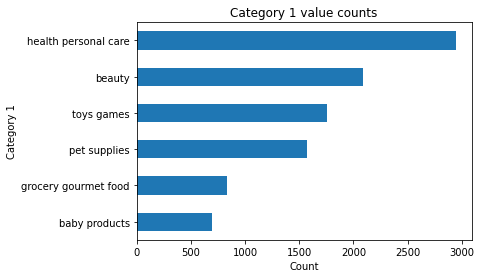

In [17]:
import matplotlib.pyplot as plt

data["cat1"].value_counts().sort_values().plot(kind = 'barh')
plt.xlabel("Count")
plt.ylabel("Category 1")
plt.title("Category 1 value counts")

Text(0.5, 1.0, 'Category 2 value counts')

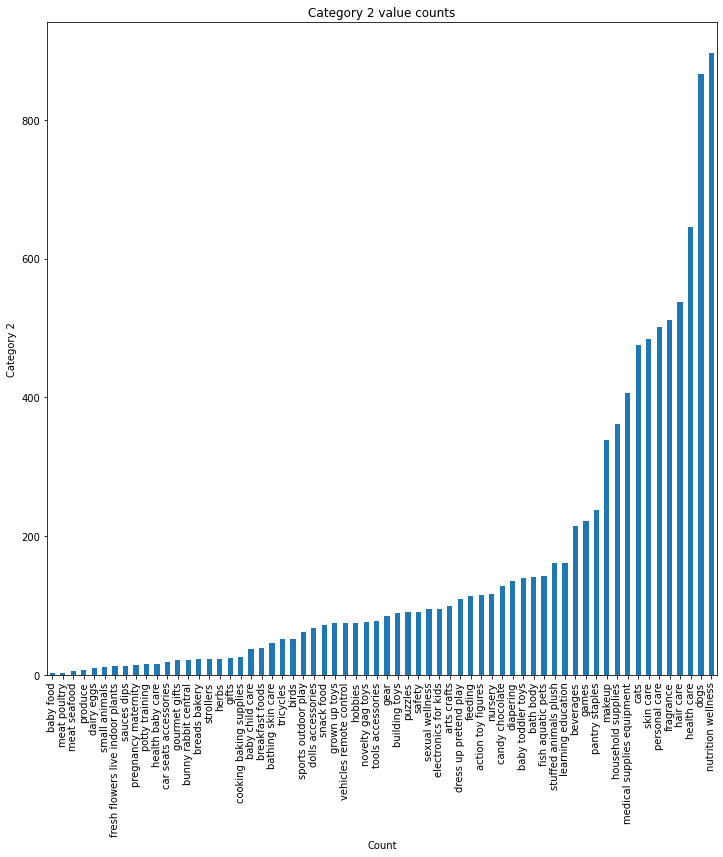

In [18]:
plt.figure(figsize=(12,12))
data["cat2"].value_counts().sort_values().plot(kind = 'bar')

plt.xlabel("Count")
plt.ylabel("Category 2")
plt.title("Category 2 value counts")

In [19]:
data[data["cat3"]=="food"]

,title,user_id,time,text,cat1,cat2,cat3,content
1,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food,"Kaytee Timothy Cubes, 1-PoundKaytee Timothy Cu..."
55,Worlds Freshest Spray Millet 5 Pound Box Nemet...,A2MBJ2J5RC9AOO,1344384000,I agree with others that shipping the sprays i...,pet supplies,birds,food,Worlds Freshest Spray Millet 5 Pound Box Nemet...
82,"Hagen Parrot VME Pro-Mix Seed, 5-Pound",AYWLGJPC5O7AQ,1344470400,This bird seed mix has the highest amount of s...,pet supplies,birds,food,"Hagen Parrot VME Pro-Mix Seed, 5-PoundHagen Pa..."
124,Canidae Dry Dog Food for All Life Stages,A2LPNXU94YAJ2S,1344556800,"I like this dog's food for my dog, it's high q...",pet supplies,cats,food,Canidae Dry Dog Food for All Life StagesCanida...
204,"World's Best 00098 Cat Litter, Clumping Formula",A8GP0MPFF5RRR,1344902400,So... World's Best Cat Litter probably doesn't...,pet supplies,cats,food,"World's Best 00098 Cat Litter, Clumping Formul..."
...,...,...,...,...,...,...,...,...
9359,Merrick Mediterranean Banquet Dog Food 13.2 oz...,A27M75LRSJ788H,1360886400,I do not want to contradict what the other rev...,pet supplies,dogs,food,Merrick Mediterranean Banquet Dog Food 13.2 oz...
9512,Hill's Science Diet Adult Sensitive Stomach Dr...,A3UVN6WZDT1ACV,1361059200,Great product. Love this brand of dog food. Gr...,pet supplies,dogs,food,Hill's Science Diet Adult Sensitive Stomach Dr...
9574,"Heath Outdoor Products DD-20 Fancy Suet Cake, ...",AHWS6CDFECQI5,1361145600,The price was good and the offer of ordering n...,pet supplies,birds,food,"Heath Outdoor Products DD-20 Fancy Suet Cake, ..."
9663,Hi-Tor Neo Diet For Cats 24/5.5-oz cans,A2YW6XOID7GV6G,1361318400,I have tried every type of low ph food for one...,pet supplies,cats,food,Hi-Tor Neo Diet For Cats 24/5.5-oz cansHi-Tor ...


In [20]:
data["cat1_cat2_cat3"] = data["cat1"] + "_" + data["cat2"] + "_" + data["cat3"]
data.head()

,title,user_id,time,text,cat1,cat2,cat3,content,cat1_cat2_cat3
0,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps,PetSafe Staywell Pet Door with Clear Hard Flap...,pet supplies_cats_cat flaps
1,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food,"Kaytee Timothy Cubes, 1-PoundKaytee Timothy Cu...",pet supplies_bunny rabbit central_food
2,Body Back Buddy,A14PK96LL78NN3,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation,Body Back BuddyBody Back BuddyBody Back Buddyw...,health personal care_health care_massage relax...
3,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats,SnackMasters California Style Turkey JerkySnac...,grocery gourmet food_snack food_jerky dried meats
4,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,pet supplies_dogs_toys


In [21]:
set(dict(data["cat1_cat2_cat3"].value_counts() < 2).keys())

{'baby products_bathing skin care_bathing tubs seats',
 'baby products_bathing skin care_grooming healthcare kits',
 'baby products_bathing skin care_shampoo',
 'baby products_bathing skin care_skin care',
 'baby products_bathing skin care_soaps cleansers',
 'baby products_bathing skin care_unknown',
 'baby products_car seats accessories_accessories',
 'baby products_car seats accessories_car seats',
 'baby products_diapering_changing table pads covers',
 'baby products_diapering_cloth diapers',
 'baby products_diapering_diaper bags',
 'baby products_diapering_diaper changing kits',
 'baby products_diapering_diaper pails refills',
 'baby products_diapering_diaper stackers caddies',
 'baby products_diapering_disposable diapers',
 'baby products_diapering_unknown',
 'baby products_diapering_wipes holders',
 'baby products_feeding_bottle feeding',
 'baby products_feeding_breastfeeding',
 'baby products_feeding_food',
 'baby products_feeding_highchairs booster seats',
 'baby products_feedi

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(["cat1", "cat2", "cat3"], axis=1), data[["cat1", "cat2", "cat3", "cat1_cat2_cat3"]], test_size=0.2, random_state=0)


print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)



X_train shape :  (7912, 6)
y_train shape :  (7912, 4)
X_test shape :  (1979, 6)
y_test shape :  (1979, 4)


In [23]:
# source : https://www.slideshare.net/abhishekkrthakur/approaching-almost-any-nlp-problem

#### Removing extra spaces

In [24]:
def remove_extra_spaces(text):
    """
    Helps in removing extra white spaces
    """
    text = text.strip()
    text = text.split()
    
    return " ".join(text)

#### Applying Spell Checker

source - github repository : https://github.com/mammothb/symspellpy 

source - usage of library : https://symspellpy.readthedocs.io/en/latest/examples/lookup.html#basic-usage 



In [25]:
import pkg_resources
from symspellpy import SymSpell, Verbosity

def correct_spellings(text):
    """
    Correct Spellings in the given text.
    """
    sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
    dictionary_path = pkg_resources.resource_filename(
        "symspellpy", "frequency_dictionary_en_82_765.txt")
    
    # term_index is the column of the term and count_index is the
    # column of the term frequency
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
    
    
    # max edit distance per lookup
    # (max_edit_distance_lookup <= max_dictionary_edit_distance)
    suggestions = sym_spell.lookup(
        text, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True)
    
    all_suggestions = [suggestion for suggestion in suggestions]
    
    # combining all the suggestions to form a single sentence
    return " ".join(all_suggestions) 

#### Contraction mapping

source : https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

In [26]:
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def mapping_contractions(text, contractions_dict=contractions_dict):
    """
    Helps in removing short forms in our text.
    """
    for word in contractions_dict.keys():
        if word in contractions_dict:
            text = text.replace(word, contractions_dict[word])
            
    return text
    

In [27]:
import nltk
nltk.download('wordnet')

def stem_words(text):
    """
    Porter Stemmer for stemming words in the sentence.
    """
    ps = nltk.stem.porter.PorterStemmer()
    text = [ps.stem(word) for word in text.split()]
    
    return " ".join(text)

[nltk_data] Downloading package wordnet to /Users/i518758/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
def perform_lemmetization(text):
    """
    Perform lemmetization of the text.
    """
    
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text.split()]
    
    return " ".join(text)

In [29]:
def remove_stopwords(text):
    """
    Remove the stop words in the text document.
    """
    
    stopwords = nltk.corpus.stopwords.words("english")
    text = [word for word in text.split() if word not in 
            stopwords]
    
    return " ".join(text)

In [30]:
def preprocess_text(text):
    """
    Preprocess the text based on the different methods.
    """
    
    text = str(text)
    
    text = remove_extra_spaces(text)
    
    #text = correct_spellings(text)
    
    text = remove_stopwords(text)
    
    text = mapping_contractions(text)
    
    text = stem_words(text)
    
    text = perform_lemmetization(text)
    
    return text

In [31]:
X_train.head()

,title,user_id,time,text,content,cat1_cat2_cat3
2918,Erector Multi Model Building Set - 5 Different...,A39PS2KDH0WFNQ,1353628800,Trying to put this thing together for my son w...,Erector Multi Model Building Set - 5 Different...,toys games_building toys_building sets
4486,Paula Dorf - Lip Liner,A1YET0B84AH3LD,1355788800,Another Paula Dorf favorite - her lip liners a...,Paula Dorf - Lip LinerPaula Dorf - Lip LinerPa...,beauty_makeup_lips
1848,Cadbury Drinking Chocolate 9oz tub 250g,A2ED2WAN9T8HZ2,1350518400,"A really, really good taste, especially when y...",Cadbury Drinking Chocolate 9oz tub 250gCadbury...,grocery gourmet food_beverages_hot cocoa
5341,Umbrella Doll Stroller,AN4AFQ2I8ZTXL,1356652800,"Although I like the stroller, I could see that...",Umbrella Doll StrollerUmbrella Doll StrollerUm...,toys games_dolls accessories_doll accessories
2811,North States Supergate Extra Wide Gate,A39V66YJ9CWBFR,1353369600,The Gate that was pictured was not the gate I ...,North States Supergate Extra Wide GateNorth St...,pet supplies_dogs_doors


In [32]:
text = X_train["content"].loc[0]

text

"PetSafe Staywell Pet Door with Clear Hard FlapPetSafe Staywell Pet Door with Clear Hard FlapPetSafe Staywell Pet Door with Clear Hard FlapWe've only had it installed about 2 weeks. So far it works great. My chubby collie & old black lab are both going in and out easily. It was easy to install. It was hanging up a little when closing but seems to be working through that. It was supposed to be a clear door & it is not. Very disappointed in that."

In [33]:
remove_extra_spaces(text)

"PetSafe Staywell Pet Door with Clear Hard FlapPetSafe Staywell Pet Door with Clear Hard FlapPetSafe Staywell Pet Door with Clear Hard FlapWe've only had it installed about 2 weeks. So far it works great. My chubby collie & old black lab are both going in and out easily. It was easy to install. It was hanging up a little when closing but seems to be working through that. It was supposed to be a clear door & it is not. Very disappointed in that."

In [34]:
remove_stopwords(text)

"PetSafe Staywell Pet Door Clear Hard FlapPetSafe Staywell Pet Door Clear Hard FlapPetSafe Staywell Pet Door Clear Hard FlapWe've installed 2 weeks. So far works great. My chubby collie & old black lab going easily. It easy install. It hanging little closing seems working that. It supposed clear door & not. Very disappointed that."

In [35]:
mapping_contractions(text)

"PetSafe Staywell Pet Door with Clear Hard FlapPetSafe Staywell Pet Door with Clear Hard FlapPetSafe Staywell Pet Door with Clear Hard FlapWe've only had it installed about 2 weeks. So far it works great. My chubby collie & old black lab are both going in and out easily. It was easy to install. It was hanging up a little when closing but seems to be working through that. It was supposed to be a clear door & it is not. Very disappointed in that."

In [36]:
stem_words(text)

"petsaf staywel pet door with clear hard flappetsaf staywel pet door with clear hard flappetsaf staywel pet door with clear hard flapwe'v onli had it instal about 2 weeks. so far it work great. my chubbi colli & old black lab are both go in and out easily. it wa easi to install. it wa hang up a littl when close but seem to be work through that. it wa suppos to be a clear door & it is not. veri disappoint in that."

In [37]:
perform_lemmetization(text)

"PetSafe Staywell Pet Door with Clear Hard FlapPetSafe Staywell Pet Door with Clear Hard FlapPetSafe Staywell Pet Door with Clear Hard FlapWe've only had it installed about 2 weeks. So far it work great. My chubby collie & old black lab are both going in and out easily. It wa easy to install. It wa hanging up a little when closing but seems to be working through that. It wa supposed to be a clear door & it is not. Very disappointed in that."

In [38]:
X_train["preprocessed_content"] = X_train["content"].apply(lambda text : preprocess_text(text))
X_train.head()

,title,user_id,time,text,content,cat1_cat2_cat3,preprocessed_content
2918,Erector Multi Model Building Set - 5 Different...,A39PS2KDH0WFNQ,1353628800,Trying to put this thing together for my son w...,Erector Multi Model Building Set - 5 Different...,toys games_building toys_building sets,erector multi model build set - 5 differ model...
4486,Paula Dorf - Lip Liner,A1YET0B84AH3LD,1355788800,Another Paula Dorf favorite - her lip liners a...,Paula Dorf - Lip LinerPaula Dorf - Lip LinerPa...,beauty_makeup_lips,paula dorf - lip linerpaula dorf - lip linerpa...
1848,Cadbury Drinking Chocolate 9oz tub 250g,A2ED2WAN9T8HZ2,1350518400,"A really, really good taste, especially when y...",Cadbury Drinking Chocolate 9oz tub 250gCadbury...,grocery gourmet food_beverages_hot cocoa,cadburi drink chocol 9oz tub 250gcadburi drink...
5341,Umbrella Doll Stroller,AN4AFQ2I8ZTXL,1356652800,"Although I like the stroller, I could see that...",Umbrella Doll StrollerUmbrella Doll StrollerUm...,toys games_dolls accessories_doll accessories,umbrella doll strollerumbrella doll strollerum...
2811,North States Supergate Extra Wide Gate,A39V66YJ9CWBFR,1353369600,The Gate that was pictured was not the gate I ...,North States Supergate Extra Wide GateNorth St...,pet supplies_dogs_doors,north state superg extra wide gatenorth state ...


In [39]:
X_test["preprocessed_content"] = X_test["content"].apply(lambda text : preprocess_text(text))
X_test.head()

,title,user_id,time,text,content,cat1_cat2_cat3,preprocessed_content
2602,Playmaker Toys Flingshot Flying Animal - Flyin...,AYPGEK5XXTLLL,1352851200,"The item was well packaged, new and with a lab...",Playmaker Toys Flingshot Flying Animal - Flyin...,toys games_stuffed animals plush_animals figures,playmak toy flingshot fli anim - fli cow with ...
6972,Skwish Color Burst (Boxed),A13RVDEPBCCI1T,1358121600,I bought this for my second son because my old...,Skwish Color Burst (Boxed)Skwish Color Burst (...,toys games_baby toddler toys_unknown,skwish color burst (boxed)skwish color burst (...
5740,Learning Resources - Pretend and Play Healthy ...,A37R0PH8FSL1L,1356998400,This toy is unlike the other Learning Resource...,Learning Resources - Pretend and Play Healthy ...,toys games_dress up pretend play_pretend play,learn resourc - pretend play healthi dinner se...
6746,VTech Sit-to-Stand Learning Walker,A27SL6IUB2D5V8,1357862400,I bought this for my baby when she was 5 month...,VTech Sit-to-Stand Learning WalkerVTech Sit-to...,baby products_gear_walkers,vtech sit-to-stand learn walkervtech sit-to-st...
5826,Star Wars Episode I Ultimate Hair Queen Amidal...,A2DLGLMV8982MR,1356998400,Bought this for my granddaughter who is into a...,Star Wars Episode I Ultimate Hair Queen Amidal...,toys games_action toy figures_playsets,star war episod i ultim hair queen amidala - q...


### Plan 1 -- Predict Individual Categories

source : https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

In [40]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing


vectorizer_bag_of_words = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer_tf_idf = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [41]:
vectorizer_bag_of_words.fit(X_train["content"])

X_train_bag_of_words = vectorizer_bag_of_words.transform(X_train["content"])

dict_bag_of_words = vectorizer_bag_of_words.vocabulary_


In [46]:
X_test_bag_of_words = vectorizer_bag_of_words.transform(X_test["content"])

test_dict_bag_of_words = vectorizer_bag_of_words.vocabulary_

In [43]:
vectorizer_tf_idf.fit(X_train["content"])

X_train_tf_idf = vectorizer_tf_idf.transform(X_train["content"])

dict_tf_idf = vectorizer_tf_idf.vocabulary_

In [56]:
classifier = naive_bayes.MultinomialNB()

classifier.fit(X_train_bag_of_words, y_train["cat1"])

predicted = classifier.predict(X_test_bag_of_words)
predicted_prob = classifier.predict_proba(X_test_bag_of_words)

In [68]:
def cal_metrics(y_test, req_plots=False):
    """
    Calculation of metrics for the predicted categories.
    """
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values

    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob, 
                                multi_class="ovr")
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))
    
    if req_plots:

        ## Plot confusion matrix
        cm = metrics.confusion_matrix(y_test, predicted)
        
        fig, ax = plt.subplots()
        
        sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                    cbar=False)
        ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
               yticklabels=classes, title="Confusion matrix")
        plt.yticks(rotation=0)

        fig, ax = plt.subplots(nrows=1, ncols=2)
        ## Plot roc
        for i in range(len(classes)):
            fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                                   predicted_prob[:,i])
            ax[0].plot(fpr, tpr, lw=3, 
                      label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(fpr, tpr))
                       )
        ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
        ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
                  xlabel='False Positive Rate', 
                  ylabel="True Positive Rate (Recall)", 
                  title="Receiver operating characteristic")
        ax[0].legend(loc="lower right")
        ax[0].grid(True)

        ## Plot precision-recall curve
        for i in range(len(classes)):
            precision, recall, thresholds = metrics.precision_recall_curve(
                         y_test_array[:,i], predicted_prob[:,i])
            ax[1].plot(recall, precision, lw=3, 
                       label='{0} (area={1:0.2f})'.format(classes[i], 
                                          metrics.auc(recall, precision))
                      )
        ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
                  ylabel="Precision", title="Precision-Recall curve")
        ax[1].legend(loc="best")
        ax[1].grid(True)
        plt.show()

Accuracy: 0.89
Auc: 0.98
Detail:
                      precision    recall  f1-score   support

       baby products       0.88      0.85      0.86       145
              beauty       0.89      0.89      0.89       438
grocery gourmet food       0.83      0.86      0.85       156
health personal care       0.87      0.88      0.87       575
        pet supplies       0.94      0.88      0.91       319
          toys games       0.91      0.95      0.93       346

            accuracy                           0.89      1979
           macro avg       0.89      0.89      0.89      1979
        weighted avg       0.89      0.89      0.89      1979



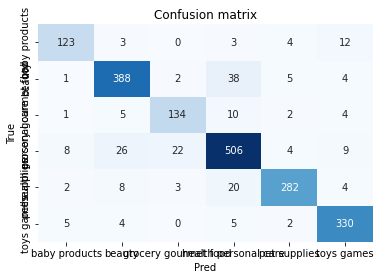

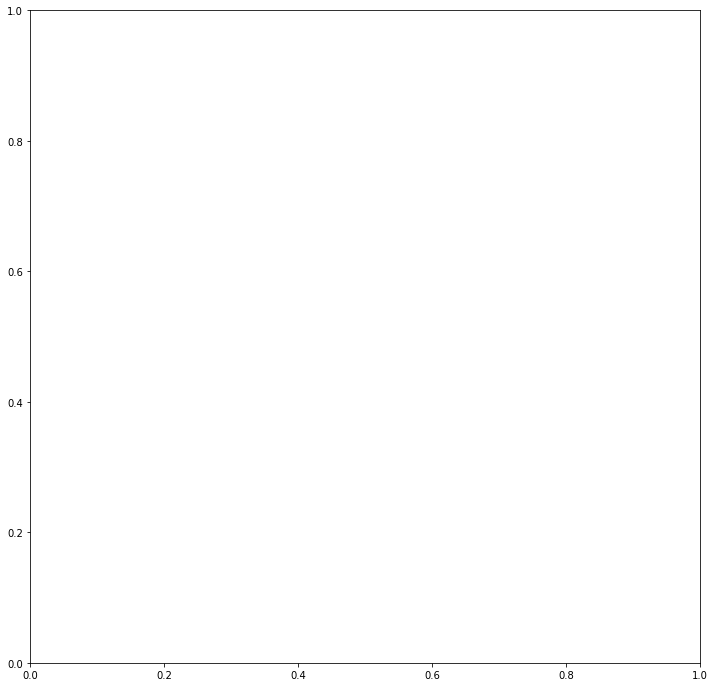

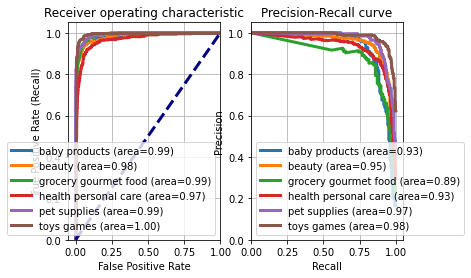

In [69]:
cal_metrics(y_test["cat1"], True)

# **Due to the time constraint, I am not able to spend more time on this. I'm really sorry for that. But listing down the approaches that I could have tried further**

### Further steps:

<hr>

<font color="green">

* Predict individual categories -- cat1, cat2, cat3 seperately and see the performance.
* Predict cat1 , include (features + cat1 ) => predict cat2 , (features + cat1 + cat2) => predict cat3
    
    <hr>

* Combine cat1, cat2, cat3 into single category and then try to predict it and further break it down.
    
    <hr>

* Try out feature engineering => extracting length of title, review text, frequent words
* Try out different feature spaces => Bag of words,tf idf, word vectors (word2vec, glove vectors, BERT embeddings (bert-as-a-service can be used), Sentence Transformer encodings using transformers pip library.)

* Try out various models => Logistic Regression, Naive Bayes, Deep learning models (Neural Networks)
    
* Hyperparamter tuning of machine learning models.
    
    <hr>
    
* Try out a simple streamlit web application and deploy using heroku for data exploration and analysis.
    
    <hr>
</font>